# Create a model that can perform CUSTOMER SEGEMENTATION
## Create a model that can classify a customer as good or bad based on customers' age and customers estimated salary

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
#Assume
# 0 -- Bad Customer (Customer that will not make a purchase)
# 1 -- Good customer (Customer that will make a purchase)

In [4]:
#Seperate data as features and label
features = data.iloc[:,[0,1]].values
label = data.iloc[:,[2]].values

In [15]:
SL = 0.05
CL = 1 - SL

#Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

for rs in range(1,300):
  X_train,X_test,y_train,y_test = train_test_split(features,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=rs)

  model = LogisticRegression()
  model.fit(X_train,y_train)

  trainScore = model.score(X_train,y_train)
  testScore = model.score(X_test,y_test)

  if testScore > trainScore and testScore >= CL:
    print(f"Test Score : {testScore} Train Score: {trainScore} RandomS: {rs}")

Test Score : 0.9625 Train Score: 0.81875 RandomS: 220


In [8]:
X_train,X_test,y_train,y_test = train_test_split(features,
                                                   label,
                                                   test_size=0.2,
                                                   random_state=220)

In [9]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
trainScore = model.score(X_train,y_train)
testScore = model.score(X_test,y_test)
print(trainScore,testScore)

0.81875 0.9625


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

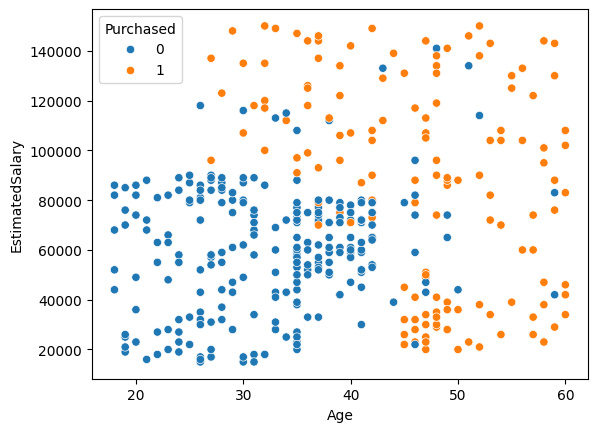

In [14]:
import seaborn as sns
sns.scatterplot(data = data,x='Age',y='EstimatedSalary', hue='Purchased')

In [16]:
#Deploy Model  (Do it on your own - Refer Linear Regression notebook)

age = float(input("Age:"))
estimatedSalary = float(input("estimatedSlary: "))

finalFeatureInput = np.array([[age,estimatedSalary]]).reshape(1,-1)

print(finalFeatureInput)

purchase = model.predict(finalFeatureInput)

if purchase > 0 :
 print(f"its good customer")
else:
 print(f"its bad customer")


Age:34
estimatedSlary: 23423
[[   34. 23423.]]
its bad customer
